__Question Statement__ 

Using the available dataset, Please determine the probability distribution of every user total quantity they have purchased including your reason on picking that probability distribution. Please give some business recommendations to Kulina based on your findings.

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
%matplotlib inline

In [ ]:
#pwd

In [5]:
df = pd.read_csv('./kulina-data/Statistics/dataset.csv')

In [12]:
df.head(10)

,id,order_date,user_id,product_id,quality
0,24,2019-01-03,62746,1,1
1,8989,2019-01-01,53424,28,1
2,8990,2019-01-01,53424,28,1
3,8991,2019-01-01,53424,28,1
4,8992,2019-01-01,53424,28,1
5,8993,2019-01-01,53424,28,1
6,8994,2019-01-01,53424,28,1
7,8995,2019-01-01,53424,28,1
8,8996,2019-01-01,53424,28,1
9,8997,2019-01-01,53424,28,1


In [17]:
df.tail(10)

,id,order_date,user_id,product_id,quality
532379,636440,2019-12-27,52375,876,1
532380,636441,2019-12-27,52375,876,1
532381,636442,2019-12-27,52375,876,1
532382,636443,2019-12-27,52375,876,1
532383,636444,2019-12-27,52375,77,1
532384,636445,2019-12-27,52375,77,1
532385,636446,2019-12-27,52375,77,1
532386,636451,2019-12-27,118653,96,1
532387,636452,2019-12-27,118653,821,1
532388,636453,2019-12-27,133327,646,1


In [15]:
df[df.quality==2]

,id,order_date,user_id,product_id,quality
102,9094,2019-01-01,67582,1,2
103,9095,2019-01-01,67582,1,2
104,9096,2019-01-01,67582,1,2
105,9097,2019-01-01,67582,1,2
106,9098,2019-01-01,67582,1,2
...,...,...,...,...,...
532225,636248,2019-12-27,114641,429,2
532314,636357,2019-12-27,114196,646,2
532317,636360,2019-12-27,118486,431,2
532319,636362,2019-12-27,118486,425,2


In [7]:
df.shape

(532389, 5)

In [8]:
df.isnull().sum()

id            0
order_date    0
user_id       0
product_id    0
quality       0
dtype: int64

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,532389.0,330533.671979,179663.589930,24.0,175649.0,333055.0,488630.0,636453.0
user_id,532389.0,81136.665138,29547.174675,6.0,63775.0,85328.0,102872.0,139605.0
product_id,532389.0,123.439479,166.035861,1.0,20.0,65.0,169.0,876.0
quality,532389.0,1.205222,2.293668,-1.0,1.0,1.0,1.0,315.0


In [10]:
listItem = []
for col in df.columns:
    listItem.append([col, df[col].dtype,
                   df[col].isna().sum(),
                   round((df[col].isna().sum()/len(df[col])) *100, 2),
                   df[col].nunique(), list(df[col].unique()[:2])]);

statdesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)

In [11]:
statdesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,id,int64,0,0.0,532389,"[24, 8989]"
1,order_date,object,0,0.0,361,"[2019-01-03, 2019-01-01]"
2,user_id,int64,0,0.0,28068,"[62746, 53424]"
3,product_id,int64,0,0.0,464,"[1, 28]"
4,quality,int64,0,0.0,74,"[1, 2]"


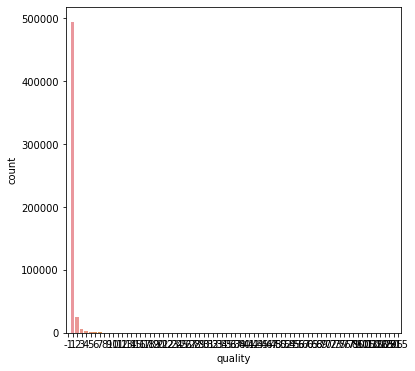

In [19]:
plt.figure(figsize=(6,6))
sns.countplot(df['quality'])

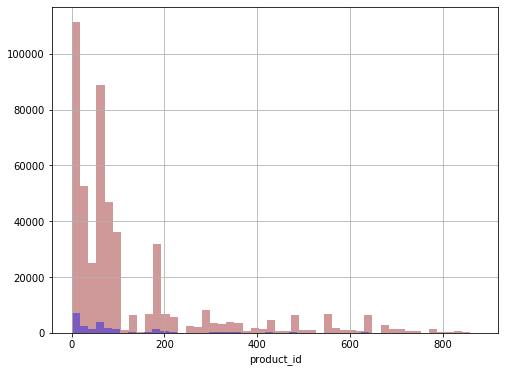

In [21]:
plt.figure(figsize=(8,6))

sns.distplot(df[df['quality'] == 1]['product_id'], kde=False, color='darkred')
sns.distplot(df[df['quality'] == 2]['product_id'], kde=False, color='blue')
# plt.legend()
plt.grid(True)
plt.show()